In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# 1. Define the functions

# 1.1. Define the general function with all the data
def cumulative_returns(start_date, end_date, tickers, benchmark, benchmark_name = "SP 500"):
    close_names_list = []
    pct_change_list =  []
    cumret_list = []
    
    # This data frame will have all the data extracted and maniupulated
    multiple_assets = pd.DataFrame()
    
    """ Prepare the data for asset analysis """
    for i in range(0, len(tickers)):
        temporary_data = yf.Ticker(tickers[i]).history(interval = "1d", 
                                                           start = start_date, 
                                                           end = end_date)["Close"]
        # Create a temporary df for data storage and manipulation
        temporary_df = pd.DataFrame(temporary_data)
    
        # Define column name para o closing price
        close_name = "Close_"+tickers[i]
        close_names_list.append(close_name)
        temporary_df = temporary_df.rename(columns={"Close": close_name})
    
    
        # Definir a coluna de pct change
   
        temporary_df["PctChange_" + tickers[i]] = temporary_df[close_name].pct_change()
        pct_change_list.append(str("PctChange_" + tickers[i]))
    
        # Definir a coluna com os returns cumulativos
        temporary_df["CumulativeReturn_" 
                 + tickers[i]] = (temporary_df[str("PctChange_" + 
                                                               tickers[i])]+1).cumprod()
        cumret_list.append(str("CumulativeReturn_"+tickers[i]))
       
        if i == 0:
            multiple_assets = temporary_df
        else:
            multiple_assets = multiple_assets.join(temporary_df, how = "left")
    
    """ Prepare de data for Benchmark analysis """
    if benchmark == "":
        cum_returns = multiple_assets[cumret_list]
    else:
        
        temporary_data = yf.Ticker(benchmark).history(interval = "1d", 
                                                           start = start_date, 
                                                           end = end_date)["Close"]
        # Define closing price data
        temporary_df = pd.DataFrame(temporary_data)
        temporary_df = temporary_df.rename(columns={"Close": benchmark_name})
        close_names_list.append(benchmark_name)

        # Define percent variation data
        temporary_df["PctChange_" + benchmark_name] = temporary_df[benchmark_name].pct_change()
        pct_change_list.append("PctChange_" + benchmark_name)
    
        # Define cumulative product data
        temporary_df["CumulativeReturn_" 
                 + benchmark_name] = (temporary_df[str("PctChange_" + 
                                                       benchmark)]+1).cumprod()
        cumret_list.append("CumulativeReturn_" + benchmark_name)
        
        # join Benchmarks data 
        multiple_assets = multiple_assets.join(temporary_df, how = "left")
        
        
        cum_returns = multiple_assets[cumret_list]
              
    """ The output will be the whole table and the smaller table with data
    from the Cumulative Returns """
    return (multiple_assets, cum_returns) 

In [3]:
# 2. Define variables and call the function 
start_date = "2020-03-31"
end_date = "2021-11-22" 
tickers = ["TSLA", "PLTR", "GOOG", "BTC-USD"]

multiple_assets = cumulative_returns(start_date, end_date, tickers, "")

In [4]:
# 3. Fetch the data for cumulative returns
cumulativeRet = multiple_assets[1] # Passar os dados para fora da função para eles não serem perdidos

<Figure size 432x288 with 0 Axes>

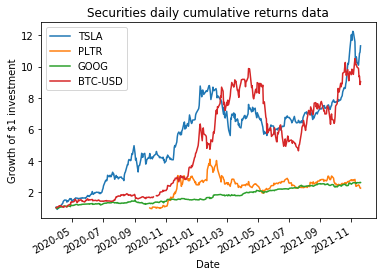

In [5]:
# 4. Plot the data

""" Data treatment for visualisation """
# Adjusting the variable names
for i in range(0, len(cumulativeRet.columns)):
    cumulativeRet = cumulativeRet.rename(columns = {str(cumulativeRet.columns[i]):str(tickers[i])})

# Create and plot the data
fig = plt.figure() 
cumulativeRet.plot()
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Securities daily cumulative returns data")
plt.show()
